imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Initalize the data
The data example used: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

you cxan download the data for free from the link above

In [2]:
data = pd.read_csv("archive/Student_performance_data _.csv")

printing the data

In [3]:
print(data.shape)
data[:5]

(2392, 15)


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


Data Visualization to see some of the Feautures and try to catch what is usefull

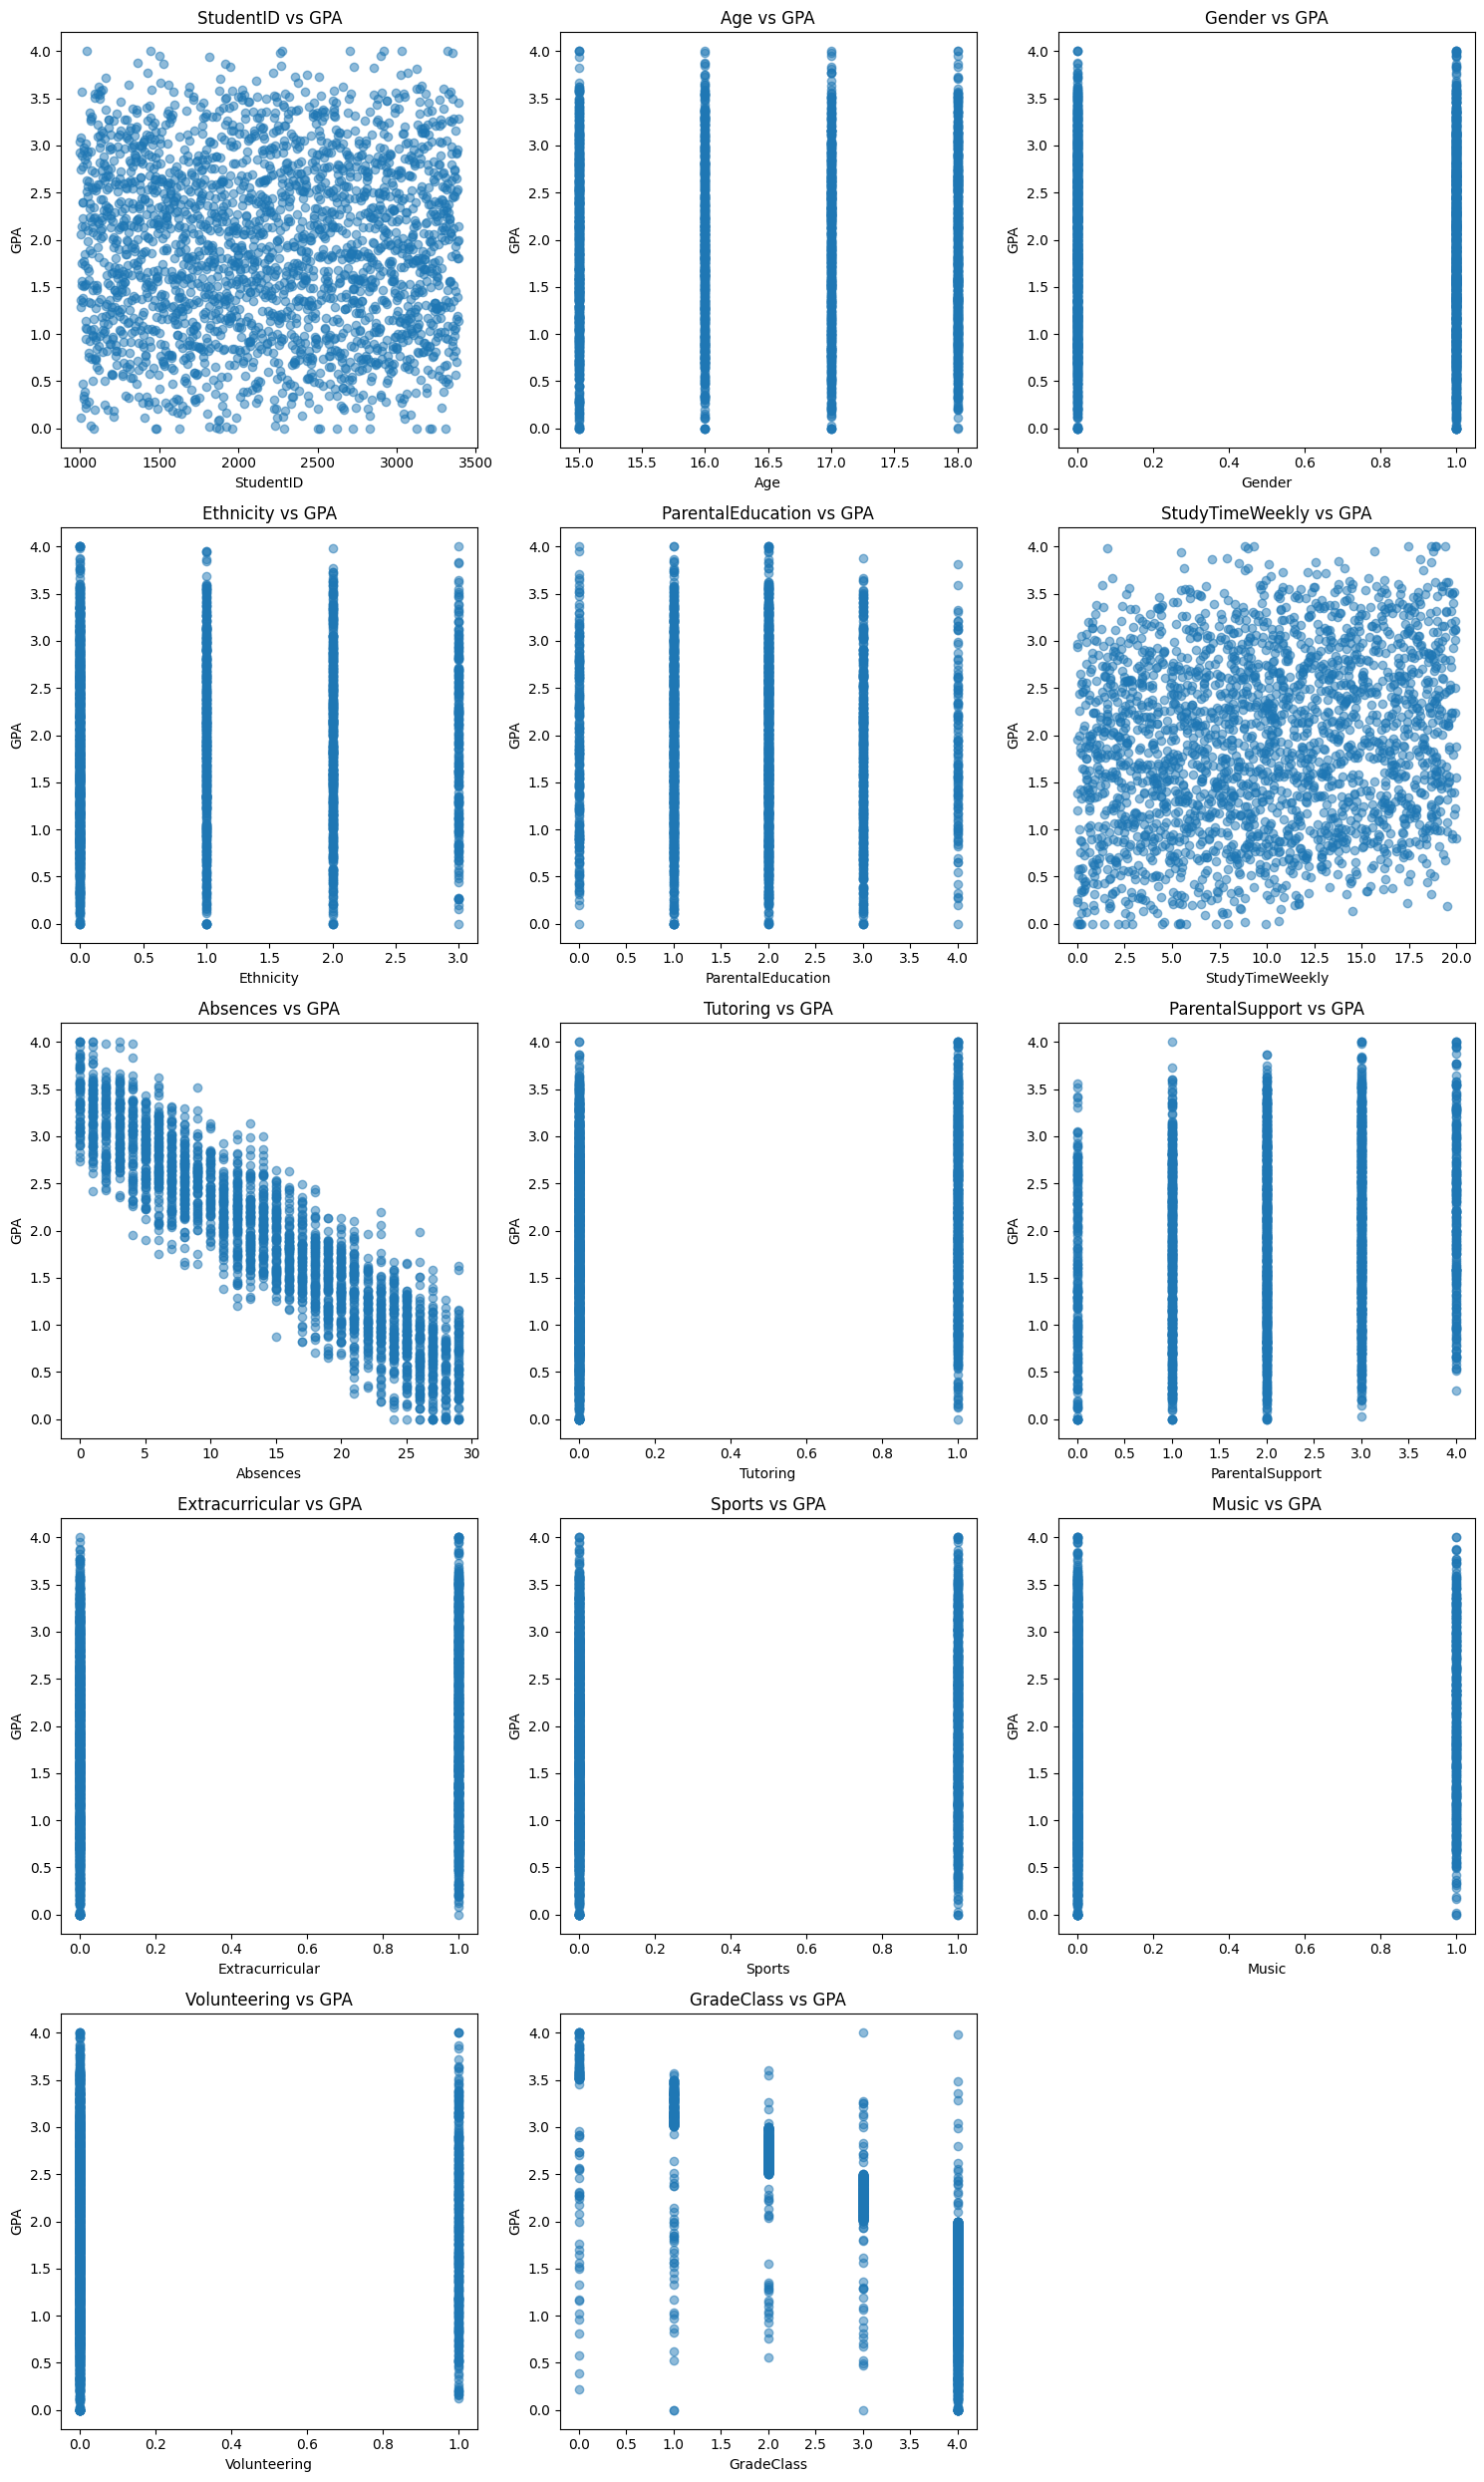

In [59]:
# Plot scatter plots
target_variable = 'GPA'
feature_names = [col for col in data.columns if col != target_variable]
num_features = len(feature_names)
num_cols = 3  # Number of columns in the grid
num_rows = int(np.ceil(num_features / num_cols))  # Number of rows

# Create subplots
plt.figure(figsize=(num_cols * 5, num_rows * 5))  # Adjust figsize as needed
for i, feature in enumerate(feature_names, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.scatter(data[feature], data[target_variable], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.title(f'{feature} vs {target_variable}')
plt.tight_layout()
plt.show()


Using seaborn to plot correlations of different features. 

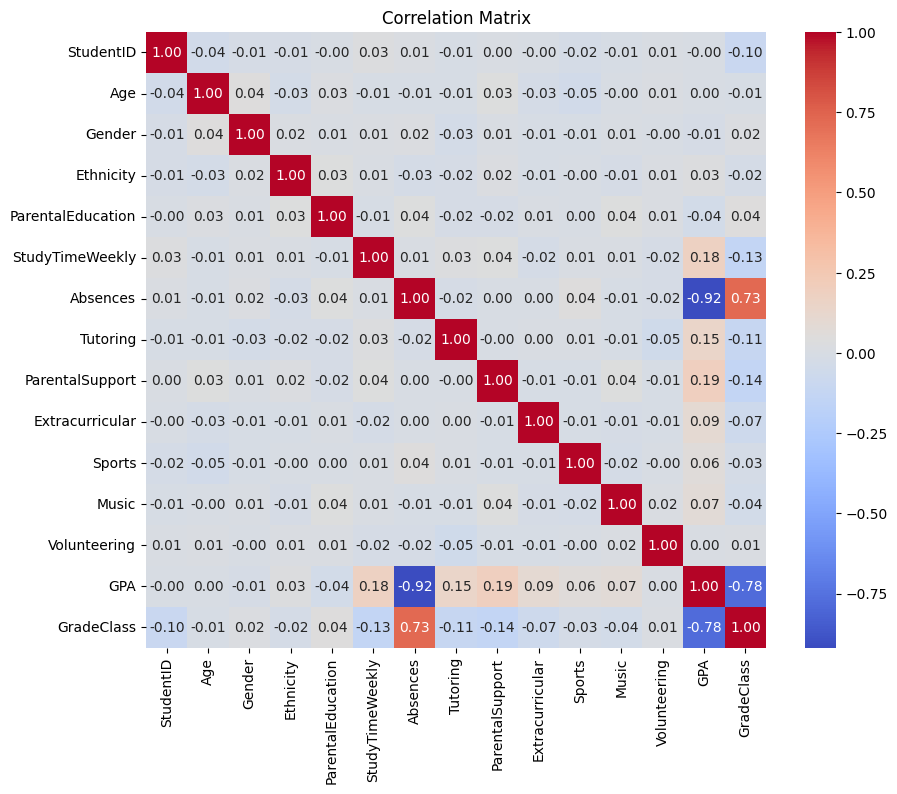

In [60]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


The features : "StudyTimeWeekly","Absences","Tutoring", "ParentalSupport","GradeClass" are concluded to be the most usefull. for a target "GPA"

In [88]:
# old model : x = data[["Age", "ParentalEducation", "StudyTimeWeekly", "Absences", "GradeClass"]].to_numpy()
x = data[["StudyTimeWeekly","Absences","Tutoring", "ParentalSupport","GradeClass"]].to_numpy()
Y = data["GPA"].to_numpy()

In [89]:
train_size = int(len(x) * 0.8)
x_training = x[:train_size]
Y_training = Y[:train_size]
x_test = x[train_size:]
Y_test = Y[train_size:]

In [90]:
print(x.shape, x_training.shape)
x[:5]

(2392, 5) (1913, 5)


array([[19.83372281,  7.        ,  1.        ,  2.        ,  2.        ],
       [15.40875606,  0.        ,  0.        ,  1.        ,  1.        ],
       [ 4.21056977, 26.        ,  0.        ,  2.        ,  4.        ],
       [10.02882947, 14.        ,  0.        ,  3.        ,  3.        ],
       [ 4.67249527, 17.        ,  1.        ,  3.        ,  4.        ]])

In [91]:
w = np.random.rand(x.shape[1])
b = np.random.rand()
alpha = 0.001

In [92]:
np.dot(x[0],w)

8.939911193780347

In [93]:
f_wb = lambda x, w, b: np.dot(x,w) + b
J = lambda x, Y, w, b: np.sum((f_wb(x, w, b) - Y)**2) * (1/(2*len(Y)))

In [94]:
J(x, Y, w, b)

45.778834489246705

In [95]:
x_vec = x[0,:]
x_vec

array([19.83372281,  7.        ,  1.        ,  2.        ,  2.        ])

In [96]:
f_wb(x_vec, w, b)

9.521366630488387

In [97]:

dj_dw = lambda x, Y, w, b: (1/len(Y)) * np.dot(x.T, (f_wb(x, w, b) - Y))
dj_db = lambda x, Y, w, b: (1/len(Y)) * np.sum(f_wb(x, w, b) - Y)

In [98]:
num_iterations = 500
cost_hist = []
for i in range(num_iterations):
    gradient_w = dj_dw(x_training, Y_training, w, b)
    gradient_b = dj_db(x_training, Y_training, w, b)
    
    # Update parameters
    w -= alpha * gradient_w
    b -= alpha * gradient_b
    
    # Compute and store cost
    cost = J(x_training, Y_training, w, b)
    cost_hist.append(cost)
    
    if i % 100 == 0:
        print(f"Iteration {i}: Cost {cost}, w: {w}, b: {b}")
    


Iteration 0: Cost 18.0551598243275, w: [0.1518297  0.25815679 0.53803889 0.07374504 0.24884341], b: 0.573159370540373
Iteration 100: Cost 0.2699286817158465, w: [ 0.10853874 -0.07369659  0.53738797  0.11641095  0.22265886], b: 0.5876224042393043
Iteration 200: Cost 0.22970933808266406, w: [ 0.10249521 -0.08232747  0.53902664  0.1691134   0.24705441], b: 0.6105066865557254
Iteration 300: Cost 0.20220891359662538, w: [ 0.09638978 -0.08888989  0.54013547  0.21162024  0.26779851], b: 0.6311327658311614
Iteration 400: Cost 0.18324011578582824, w: [ 0.09132606 -0.09438273  0.54082323  0.245879    0.28541335], b: 0.6499130424530997


In [105]:
# "StudyTimeWeekly","Absences","Tutoring", "ParentalSupport","GradeClass"
f_wb([13, 5, 0, 3, 2],w, b)

2.725408334759029

In [100]:
gradient_w = dj_dw(x, Y, w, b)
gradient_b = dj_db(x, Y, w, b)

print("Gradient with respect to w:", gradient_w)
print("Gradient with respect to b:", gradient_b)

Gradient with respect to w: [-0.19887364 -0.4031547  -0.01012988 -0.28923013 -0.1398127 ]
Gradient with respect to b: -0.18765283579822065


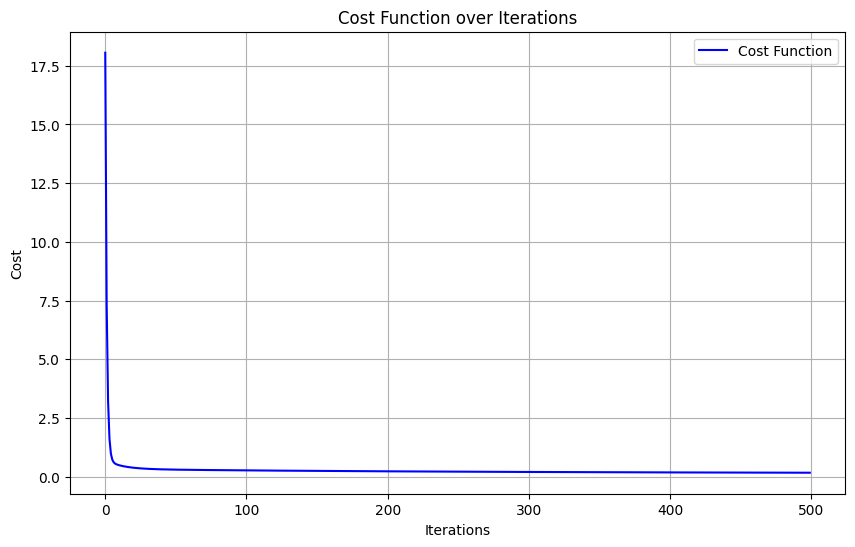

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(cost_hist, color='blue', label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.legend()
plt.grid(True)
plt.show()

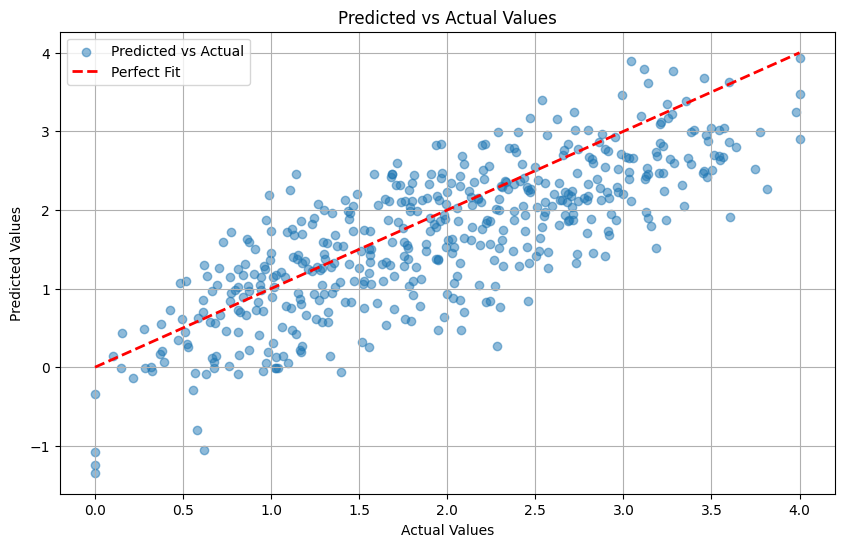

In [102]:

predictions = f_wb(x_test, w, b)

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--', lw=2, label='Perfect Fit')  # Line for perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()

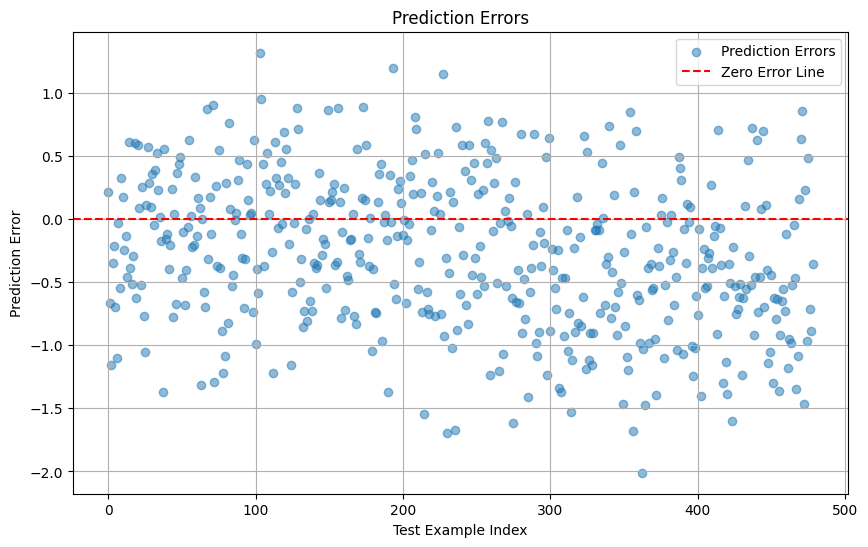

In [103]:
errors = predictions - Y_test

# Plot prediction errors
plt.figure(figsize=(10, 6))
plt.scatter(range(len(errors)), errors, alpha=0.5, label='Prediction Errors')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Error Line')
plt.xlabel('Test Example Index')
plt.ylabel('Prediction Error')
plt.title('Prediction Errors')
plt.legend()
plt.grid(True)
plt.show()

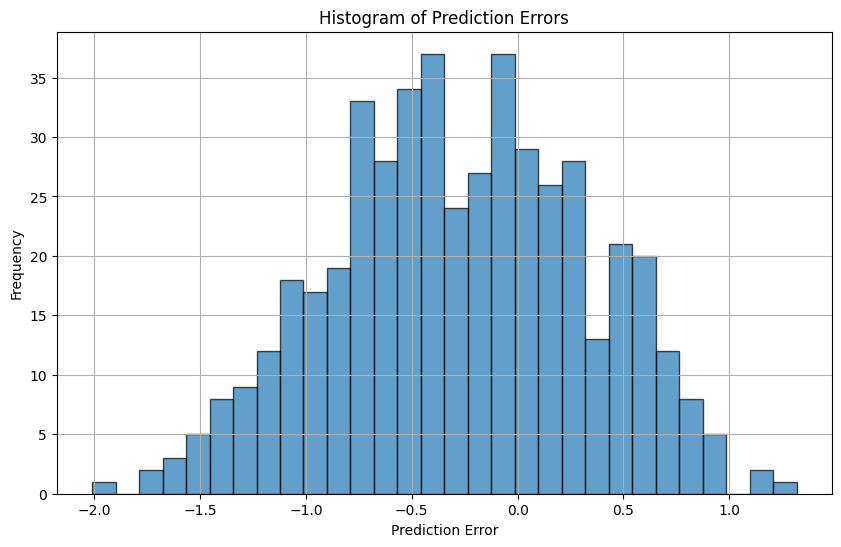

In [104]:
# Plot histogram of prediction errors
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.grid(True)
plt.show()

In [106]:
test_cost = J(x_test, Y_test, w, b)
print(f"Test Cost: {test_cost}")

Test Cost: 0.2173060593123217


In [107]:
for i in range(len(Y_test[:5])):
    print(f"Example {i}: Predicted {predictions[i]}, Actual {Y_test[i]}")

Example 0: Predicted 1.8745942823656083, Actual 1.6626921985519796
Example 1: Predicted 2.2954912143048367, Actual 2.9640587263043403
Example 2: Predicted 0.8762482040494295, Actual 2.03217846252961
Example 3: Predicted 2.857890229215503, Actual 3.207819245384204
Example 4: Predicted 2.340115340772048, Actual 2.553484846074773


In [114]:
# "StudyTimeWeekly","Absences","Tutoring", "ParentalSupport","GradeClass"
new_data = np.array([[20, 0, 0, 4,  3]])  # Replace with actual feature values
new_prediction = f_wb(new_data, w, b)
print(f"Prediction for new data: {new_prediction}")

Prediction for new data: [4.40376987]
